In [1]:
import sys
import pickle
sys.path.append('../..')
from datetime import datetime 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse 
from comp_models import ss, conf_ss, plot_comp, conf_all_models, ss_all_models

In [2]:
CITY = 2304400
CITY_NAME = 'Fortaleza'
STATE = 'CE'

There is some abreviations in this notebook: 
- **TL** refers to the transfer learning model;
- **NN** refers to the Bi-LSTM model;
- **ML** refers to the PGBM model; 
- **SS** refers to Skill Score. 

### Comp the predictions with loss = MSLE: 

We will analyse these data between '2022-01-02' e '2022-05-08':

In [3]:
with open(f'../../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
    data_nn = pickle.load(f)
    
doenca = 'dengue'
with open(f'../../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
        data_ml = pickle.load(f)

with open(f'../../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
        data_tl = pickle.load(f)

In [4]:
data_ml.keys()

dict_keys(['target', 'dates', 'preds', 'preds25', 'preds975', 'train_size'])

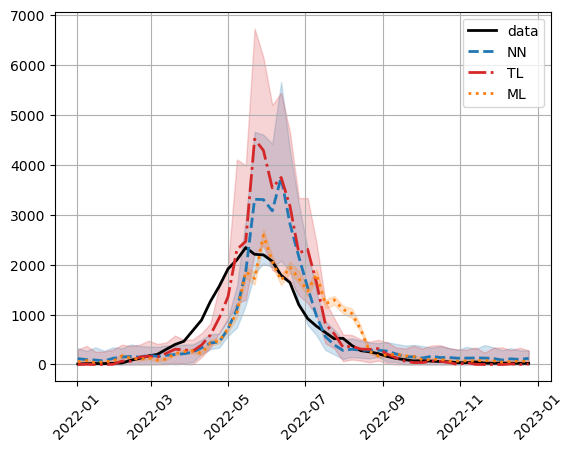

RMSE - ML: 426.70762816892295
RMSE - NN: 546.1084393839343
RMSE - TL: 673.6015270809276


In [5]:
ini_evaluate = '2022-01-02'
end_evaluate = '2023-01-01'

plot_comp(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

In [6]:
conf_all_models(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

---------------------------
NN compared to ML:
lower: -1.162278989256746
upper: -0.03804378387801666
---------------------------
TL compared to NN:
lower: 0.27156146775968454
upper: 0.6510013466212554
---------------------------
TL compared to ML:
lower: 0.17452483064886853
upper: 0.5998045616832643
---------------------------


Let's see the value of SS by period considering de LOSS MSLE: 

In [7]:
ss_all_models(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

---------------------------
NN compared to ML:
SS: -0.27981878769634627
---------------------------
TL compared to NN:
SS: -0.2334574573519106
---------------------------
TL compared to ML:
SS: -0.5786020277431398
---------------------------
